In [11]:
import datetime as dt
import pandas as pd
import xarray as xr
import netCDF4 as nc
import zarr
import numpy as np
import ocf_blosc2
import matplotlib.pyplot as plt

from psp.serialization import load_model
from psp.typings import X
from psp.models.regressors.decision_trees import SklearnRegressor

#load in ExpConfig for specific site
from exp_results.myenergi_4096samp.config import ExpConfig

In [ ]:
#load in list of pv_ids


In [2]:
#Load in the model being used 
config = ExpConfig()

model = load_model('/home/zak/pv-site-prediction/exp_results/myenergi_4096samp/model_2.pkl')

model.set_data_sources(**config.get_data_source_kwargs())

In [3]:
#User can set start and end times as well as the horizons to collect the data for
start_time = pd.to_datetime(dt.datetime(2022,7, 1))
end_time = pd.to_datetime(dt.datetime(2022,7, 2))

horizon_from = 0
horizon_to = 2
#interval between horizons in minut
interval = 1

#horizon_index needs to be an int
horizon_index = np.linspace(horizon_from, horizon_to, num=int((horizon_to-horizon_from)/interval)+1).astype(int)
horizon_minutes = (horizon_index * 60).astype(int)

print(horizon_index)
print(horizon_minutes)

#Also need to load in the pv_ids

[0 1 2]
[  0  60 120]


In [7]:
power_data = []

In [8]:

#Add an additional for loop for the pv_id

#As the task is so slow, could have 1 task running for each pv_id
for i in range(len(horizon_index)):
    print(i)
    ts = start_time
    while ts < end_time:
        x = X(pv_id='16031157', ts=ts )#- dt.timedelta(minutes=horizon_minutes))
        y = model.predict(x)
        powers = y.powers
        power_at_index = powers[horizon_index[i]]
        mins = horizon_minutes[i]
        offset = dt.timedelta(minutes=int(mins))
        time = ts + offset
        power_data.append({'pv_id': '16031157', 'power': power_at_index, 'horizon_index': horizon_index[i], 'ts': ts, 'time': time}) # append a dictionary to the list
        
        #set the minutes here to the interval
        #This is also where you could make forecast every 24 hours and start at specific time say 10am to 
        #Only get forecasts made a 10am.
        ts += dt.timedelta(minutes=60)
        print("ts: ", ts)
        print(power_data)
        
df = pd.concat([pd.DataFrame(power_data)])
print(df)


0
ts:  2022-07-01 01:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}]
ts:  2022-07-01 02:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}]
ts:  2022-07-01 03:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}]
ts:  2022-07-01 04:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts'

ts:  2022-07-01 11:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 16:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 20:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 23:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 02:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 05:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 07:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 09:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 11:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 13:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 15:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 17:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 19:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 21:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 23:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 01:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 03:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 05:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 07:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 08:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 09:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 10:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 11:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 12:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 13:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 14:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 15:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 16:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 17:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 18:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 19:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 20:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 21:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 22:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-01 23:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

ts:  2022-07-02 00:00:00
[{'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 00:00:00'), 'time': Timestamp('2022-07-01 00:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 01:00:00'), 'time': Timestamp('2022-07-01 01:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 02:00:00'), 'time': Timestamp('2022-07-01 02:00:00')}, {'pv_id': '16031157', 'power': 0.0, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 03:00:00'), 'time': Timestamp('2022-07-01 03:00:00')}, {'pv_id': '16031157', 'power': 17.06776792745572, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 04:00:00'), 'time': Timestamp('2022-07-01 04:00:00')}, {'pv_id': '16031157', 'power': 114.03876974393279, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 05:00:00'), 'time': Timestamp('2022-07-01 05:00:00')}, {'pv_id': '16031157', 'power': 291.96427803294364, 'horizon_index': 0, 'ts': Timestamp('2022-07-01 06:00:00'), 

In [9]:
df

,pv_id,power,horizon_index,ts,time
0,16031157,0.000000,0,2022-07-01 00:00:00,2022-07-01 00:00:00
1,16031157,0.000000,0,2022-07-01 01:00:00,2022-07-01 01:00:00
2,16031157,0.000000,0,2022-07-01 02:00:00,2022-07-01 02:00:00
3,16031157,0.000000,0,2022-07-01 03:00:00,2022-07-01 03:00:00
4,16031157,17.067768,0,2022-07-01 04:00:00,2022-07-01 04:00:00
...,...,...,...,...,...
67,16031157,2.224090,2,2022-07-01 19:00:00,2022-07-01 21:00:00
68,16031157,0.000000,2,2022-07-01 20:00:00,2022-07-01 22:00:00
69,16031157,0.000000,2,2022-07-01 21:00:00,2022-07-01 23:00:00
70,16031157,0.000000,2,2022-07-01 22:00:00,2022-07-02 00:00:00


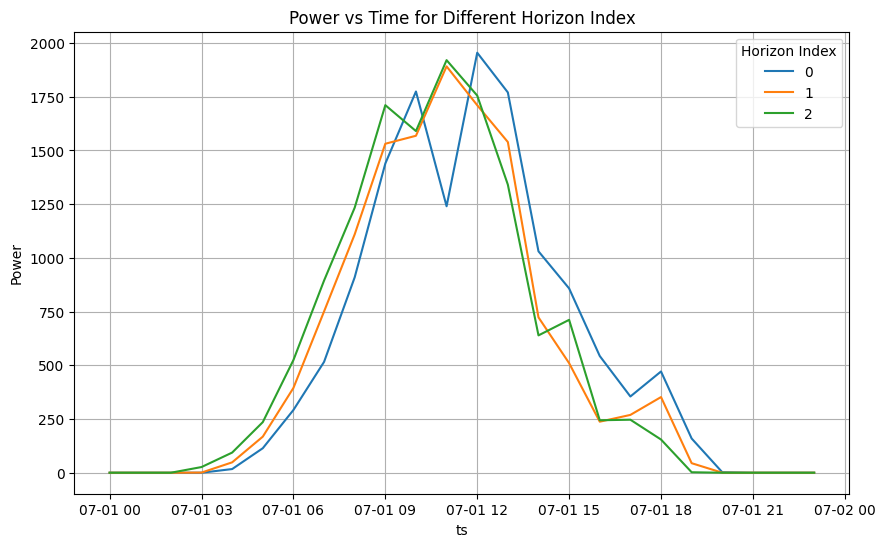

In [15]:
# group data by horizon_index
groups = df.groupby('horizon_index')

# plot each group separately
fig, ax = plt.subplots(figsize=(10,6))
for name, group in groups:
    ax.plot(group['ts'], group['power'], label=name)

# add legend and labels
plt.legend(title='Horizon Index')
plt.ylabel('Power')
plt.xlabel('ts')
plt.title('Power vs Time for Different Horizon Index')

plt.grid(True)

plt.show()

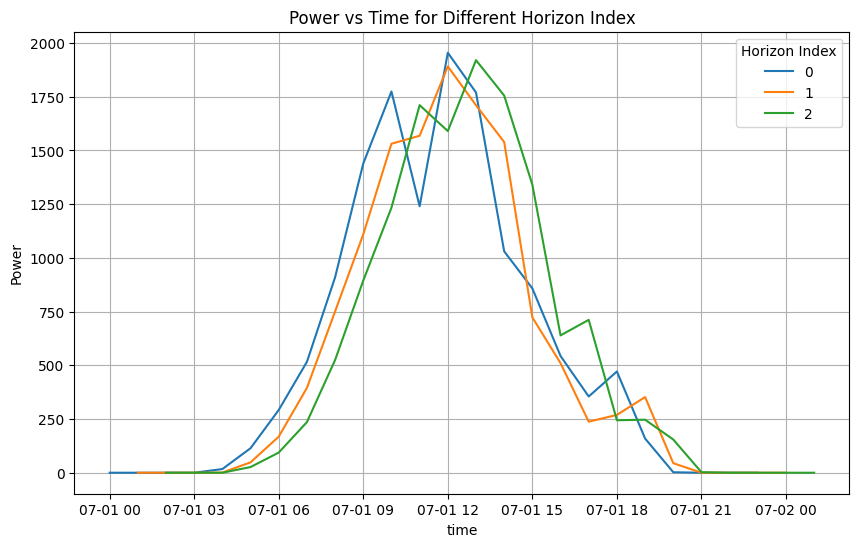

In [16]:
# group data by horizon_index
groups = df.groupby('horizon_index')

# plot each group separately
fig, ax = plt.subplots(figsize=(10,6))
for name, group in groups:
    ax.plot(group['time'], group['power'], label=name)

# add legend and labels
plt.legend(title='Horizon Index')
plt.ylabel('Power')
plt.xlabel('time')
plt.title('Power vs Time for Different Horizon Index')

plt.grid(True)

plt.show()